Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


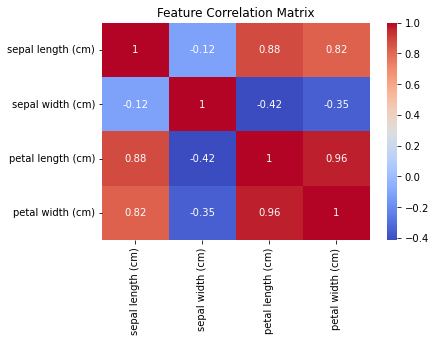

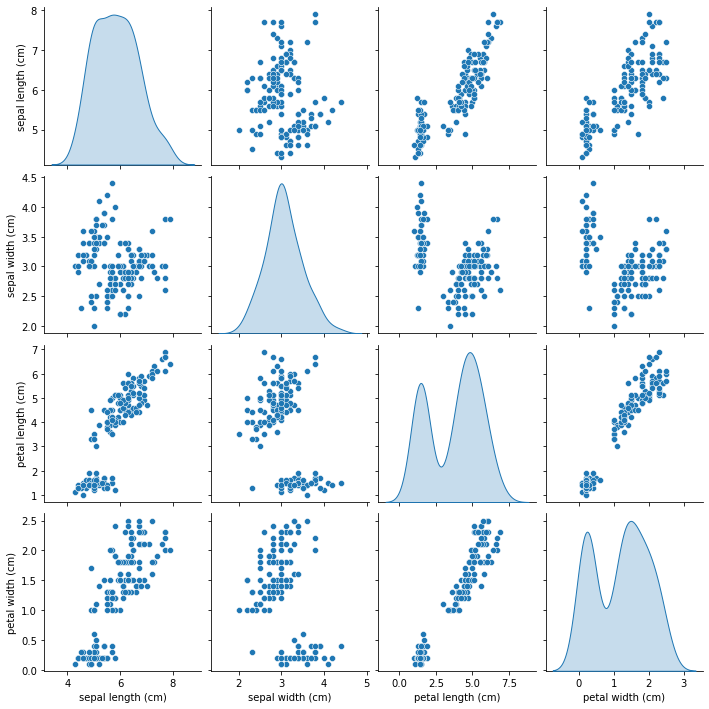

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# 1. Data Cleaning
print("Initial Data Info:")
print(df.info())  # Checking for missing values

df.drop_duplicates(inplace=True)  # Removing duplicates

# Handling outliers using Z-score method
z_scores = np.abs(zscore(df.iloc[:, :-1]))
df = df[(z_scores < 3).all(axis=1)]

# 2. Data Normalization & Transformation
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# 3. Statistical Correlation Analysis
corr_matrix = df.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# 4. Feature Engineering (OneHot Encoding for categorical feature - species)
ohe = OneHotEncoder(sparse=False)
species_encoded = ohe.fit_transform(df[['species']])
encoded_df = pd.DataFrame(species_encoded, columns=[f'species_{i}' for i in range(species_encoded.shape[1])])
df = pd.concat([df.drop('species', axis=1), encoded_df], axis=1)

# 5. Data Visualization
sns.pairplot(pd.DataFrame(data.data, columns=data.feature_names), diag_kind='kde')
plt.show()

# 6. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df.iloc[:, :-3])

# Visualizing Clusters with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.iloc[:, :-4])
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# 7. Cluster Assessment using Histogram
sns.histplot(df['cluster'], bins=3, kde=True)
plt.title("Cluster Distribution")
plt.show()

print("Clustering Completed and Visualized!")


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [3]:
from sklearn.datasets import load_iris

# Load the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Display initial data info
print("Initial Data Info:")
print(df.info())  # Checking for missing values


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handling outliers using Z-score method
z_scores = np.abs(zscore(df.iloc[:, :-1]))
df = df[(z_scores < 3).all(axis=1)]

print("Data Cleaning Completed!")


Data Cleaning Completed!


In [5]:
# Apply MinMax Scaling
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

print("Data Normalization Completed!")


Data Normalization Completed!


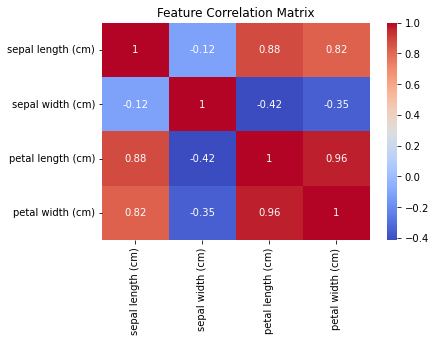

In [6]:
# Compute correlation matrix
corr_matrix = df.iloc[:, :-1].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [7]:
# OneHot Encoding for categorical feature 'species'
ohe = OneHotEncoder(sparse=False)
species_encoded = ohe.fit_transform(df[['species']])

# Convert encoded species to DataFrame
encoded_df = pd.DataFrame(species_encoded, columns=[f'species_{i}' for i in range(species_encoded.shape[1])])

# Merge encoded data with the main DataFrame
df = pd.concat([df.drop('species', axis=1), encoded_df], axis=1)

print("Feature Engineering Completed!")


Feature Engineering Completed!


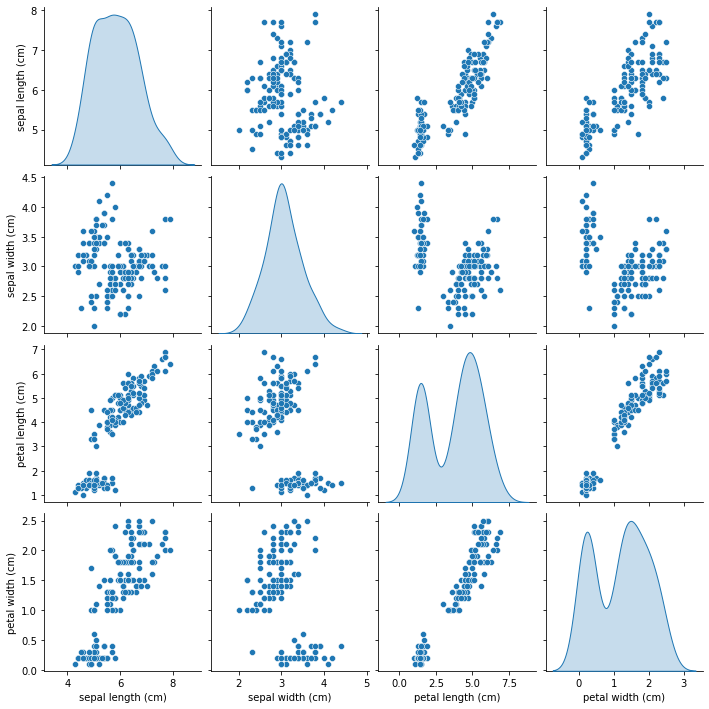

In [8]:
sns.pairplot(pd.DataFrame(data.data, columns=data.feature_names), diag_kind='kde')
plt.show()


In [9]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df.iloc[:, :-3])

print("K-Means Clustering Completed!")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [10]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.iloc[:, :-4])

# Scatter plot of clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [11]:
# Plot histogram to analyze cluster distribution
sns.histplot(df['cluster'], bins=3, kde=True)
plt.title("Cluster Distribution")
plt.show()

print("Clustering Completed and Visualized!")


KeyError: 'cluster'

In [12]:
# Apply K-Means Clustering

# Step 1: Check the shape of the data before clustering
print("Shape of data before clustering:", df.iloc[:, :-3].shape)

# Step 2: Check for missing values
if df.iloc[:, :-3].isnull().sum().sum() > 0:
    print("Missing values detected. Filling with column mean.")
    df.iloc[:, :-3].fillna(df.iloc[:, :-3].mean(), inplace=True)

# Step 3: Ensure that only numerical features are used
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Step 4: Apply K-Means clustering on the correct feature set
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[numerical_features])

print("K-Means Clustering Completed!")


Shape of data before clustering: (150, 4)
Missing values detected. Filling with column mean.


C:\Users\KIIT\AppData\Local\Temp\ipykernel_6092\2330514239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, :-3].fillna(df.iloc[:, :-3].mean(), inplace=True)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').